***
<span style="color:#008385">

**15-110: Principles of Computing**, *CMU-Qatar* Spring'25

**Hend Gedawy**

<u>Disclaimer:</u> This notebook was prepared for personal use and for in-class teaching purposes.  Third-parties are not allowed to distribute it publicly. <br>The notebook does include material from different web sources. I'll be happy to explicitly acknowledge a source if required. 
</span>

***
# Jupyter Notebook

The [**Jupyter Notebook**](https://jupyter.org/) is an open-source web application that allows to create and share documents (Notebooks) that can integrate computer code (e.g. python) and rich text elements (paragraph, equations, figures, links, multimedia, etc.)

**Use JupyterLab from Anaconda!** 
- In the coming lecture, we will elaborate more on this application and learn different things; including formatting text, including math sybmols, images.

***
# Matplotlib Module

In this lecture we will talk about how to produce scientific graphs using the python library [matplotlib](https://matplotlib.org/).
Matplotlib provides a number of functions that will allow you to quickly and easily produce a variety of useful, pretty graphs.

Matplotlib is not included by default with Python. It is a separate python library that is downloaded and installed alongside python. If you installed python using anaconda, you probably already have it.

In order to use matplotlib you need to import it like this
```
import matplotlib.pyplot as plt
```
The name after `as` is just an abbreviation for the library. That means that, whenever we want to use a function from matplotlib, we will prefix it with `plt`.

**DISCLAIMER:** The graphs we will plot here are highly customizable, and we are far from exhausting every configuration option. We encourage you to check [matplotlib's documentation](https://matplotlib.org/stable/api/index.html) and the [gallery of examples](https://matplotlib.org/stable/gallery/index.html) to find out more.

## Plot - Basics

The `plot` graph simply plots whatever coordinates we pass to it.

If we pass coordinates separately, it plots the points:

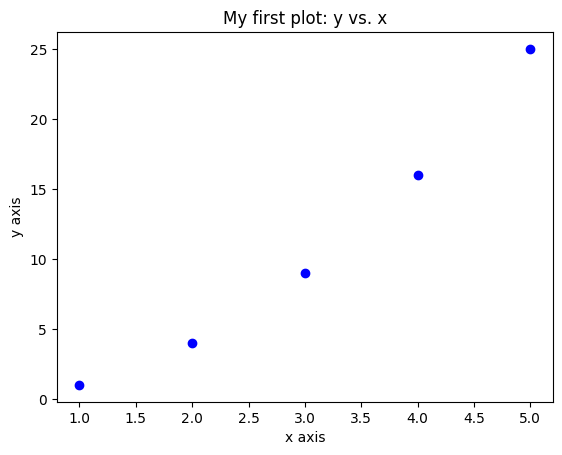

In [92]:
import matplotlib.pyplot as plt

def drawPoints():
    plt.title("My first plot: y vs. x")  # the title to give to the figure
    
    plt.xlabel("x axis")  # x-axis label
    plt.ylabel("y axis")  # y-axis label

    # Plotting each point separately

    # First parameter: x coordinates
    # Second parameter: y coordinates
    # 'b' stands for blue, and 'o' stands for circle
    plt.plot(1,1,'bo')
    plt.plot(2,4,'bo')
    plt.plot(3,9,'bo')
    plt.plot(4,16,'bo')
    plt.plot(5,25,'bo')

    # Renders the graph on the screen
    plt.show()
    
drawPoints()

Alternatively, we can pass the x coordinates as a list (first parameter) and the y coordinates as a list (second parameter). In this case, mathplotlib will connect the dots. Observe that the lists must be in the correct order. That means that (x,y) coordinates of the same point need to be at the same position in both lists.

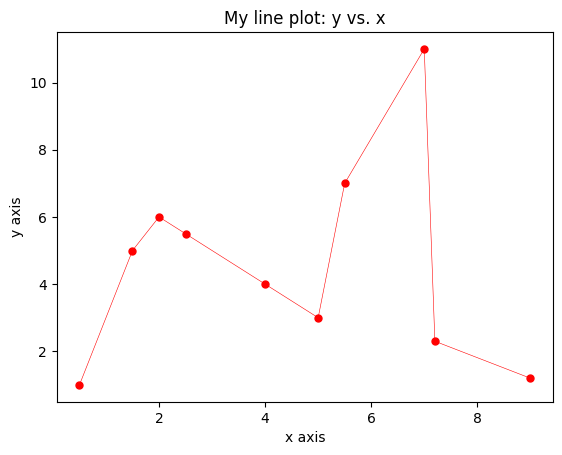

In [93]:
def drawLine():
    plt.title("My line plot: y vs. x")  # the title to give to the figure
    plt.xlabel("x axis")  # x-axis label
    plt.ylabel("y axis")  # y-axis label

    # the dataset
    xvals = [0.5, 1.5, 2, 2.5, 4, 5, 5.5, 7, 7.2, 9]
    yvals = [1, 5, 6, 5.5, 4, 3, 7, 11, 2.3, 1.2]

    # First parameter: x coordinates
    # Second parameter: y coordinates
    # 'r' stands for red
    plt.plot(xvals,yvals, 'r')#, marker='o', markersize=5,  markerfacecolor='r', markeredgecolor='blue', linewidth=0.4)
    
    plt.show()
    
drawLine()

***
# From CSV data to graphical visualization of the data

As we saw, when you are plotting data from your dataset, the data points that you want to show should be saved in lists; one for values and one for y

## Read the dataset using CSV methods

Let's read a **CSV file** with financial data. We want to inspect the behavior of a few indicators, such as the closing value, the opening value, and the trade volume.

In [2]:
#%cat Code/AAPL.csv

In [94]:
'''The AAPL.csv dataset typically contains historical stock price data for Apple Inc. (AAPL). 
This dataset is often used for financial analysis, stock market predictions, and data visualization projects.
'''
f = open('Code/AAPL.csv')

***
Let's deal with the file using the methods from the `csv` module 

In [96]:
import csv 
f_csv = csv.reader(f) #returns iterale obj

The first line of the file, the header, contains the names/descriptions of the fields (the columns of the dataset)

In [97]:
# Use next() to get the first row (usually the header)
fieldnames = next(f_csv)

In [98]:
fieldnames

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

***
We can read now the file record by record and store the values of the columns `Date, Open, Close, Volume` in <font color='blue'>different lists</font> (note  that we will exploit the knowledge of what content is reported in a column). 
- Date: The date of the trading day.
- Open: The opening price of the stock on that day.
- Close: The closing price of the stock on that day.
- Volume: The number of shares traded on that day.
'''

Apart from `Date`, all values (that are read as strings) are numeric, such that they are casted as **floats**. 

In [17]:
open_val = []
close_val = []
volume = []
dates = []

#each iteration record has the values of the next line stored in a list of strings
for record in f_csv: 
        #print(record)
        
        dates.append(record[0]) 
        open_val.append( float(record[1]) )
        close_val.append( float(record[4]) )
        volume.append( float(record[6]) )
        

***
Count total number of records

In [18]:
len(close_val)

253

In [19]:
#close_val

***
## Exploratory Data Analysis (EDA) by visual inspection of the data

How do we check what has happened for the Apple shares? How do we <font color='blue'>inspect the data visually?</font>

Let's make <font color='red'>**data plots!**</font>

### Data plots

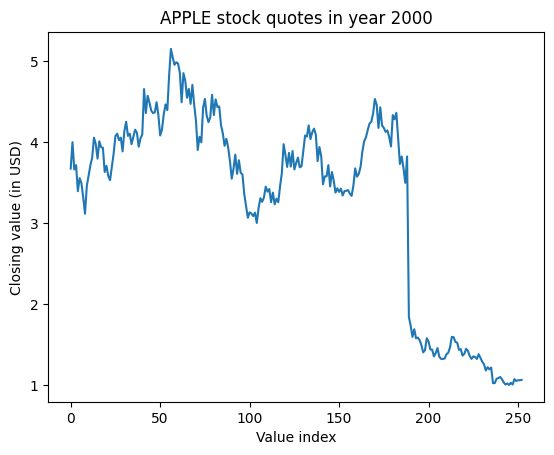

In [100]:
plt.title("APPLE stock quotes in year 2000")  # the title to give to the figure
plt.xlabel("Value index")  # x-axis label
plt.ylabel("Closing value (in USD)")  # y-axis label
plt.plot(close_val)
plt.show()

***
### Multiple data plots 

Closing and opening values look similar, can we compare them in the same data plot? $\to$ <font color='blue'>**Multiple plots**</font> in the same figure!



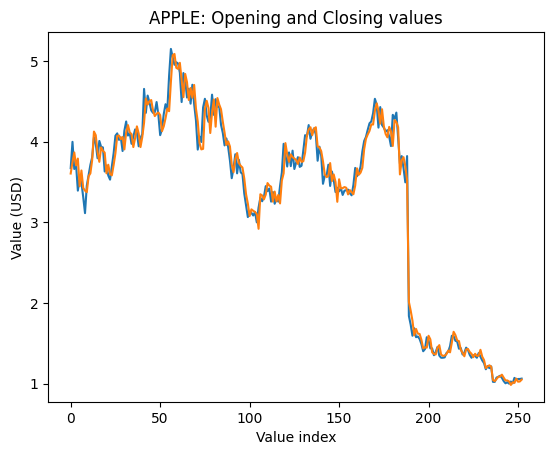

In [101]:
plt.title("APPLE: Opening and Closing values")  
plt.xlabel("Value index") 
plt.ylabel("Value (USD)") 

plt.plot(close_val)
plt.plot(open_val)

plt.show()

***
### Style of the plots

Can we improve readability by controlling <font color='blue'> **style / width of lines** </font> and adding a <font color='red'>**legend?**</font>


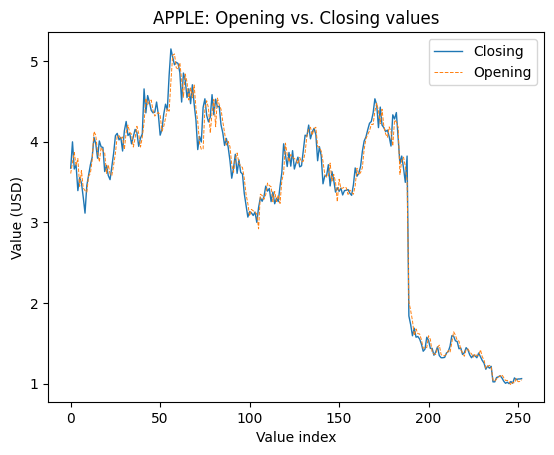

In [102]:
plt.title("APPLE: Opening vs. Closing values")  
plt.xlabel("Value index") 
plt.ylabel("Value (USD)") 

plt.plot(close_val, linewidth=1, label='Closing')
plt.plot(open_val, linewidth=0.7, linestyle='dashed', label = 'Opening')
#plt.plot(volume, linewidth=0.7, linestyle='solid', label = 'Volumes')

plt.legend()

plt.show()

***
Different linestyles for the lines:

**Solid: '_'**

**Dotted: '.'**

**Dashed: '--'**

**Dashdot: '_.'**


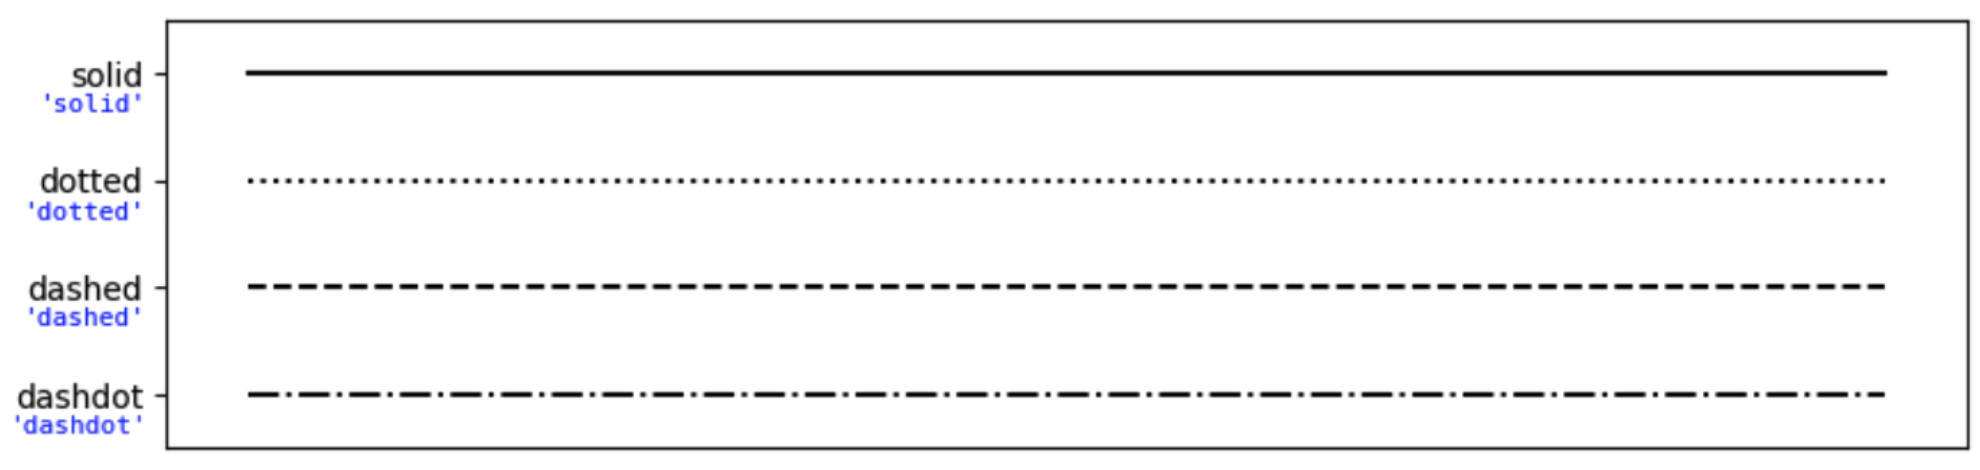

***
### More Styling

**Writing date labels**

What about the **dates** on the x axis? Can we write them in a nice way? $\to$ <font color='blue'>**Control ticks/labels on the axes** </font>

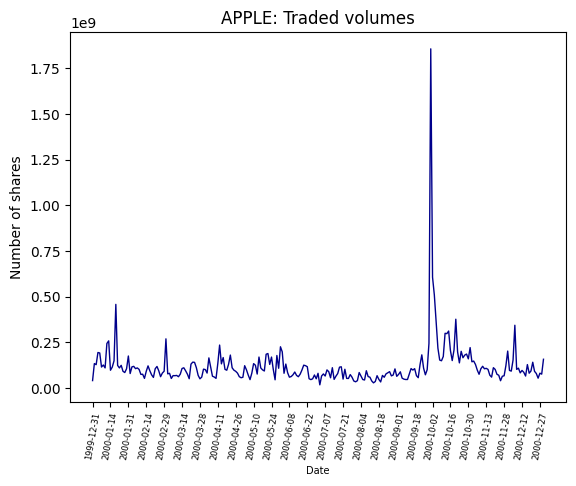

In [41]:
plt.title("APPLE: Traded volumes")
plt.xlabel("Date", fontsize=7) 
plt.ylabel("Number of shares") 

xTotalPoints = len(dates)
xTicksPositions = range(0, xTotalPoints, 10)
xTicksLabels =  dates[0:n_values:10]
plt.xticks(xNumberOfPoints, xTicksLabels, fontsize=6, rotation=80)

plt.plot(volume, linewidth=1, color = 'darkblue') 
plt.show()

***Add a grid***

Can we add a <font color='blue'>**grid**</font> to read the values more clearly?

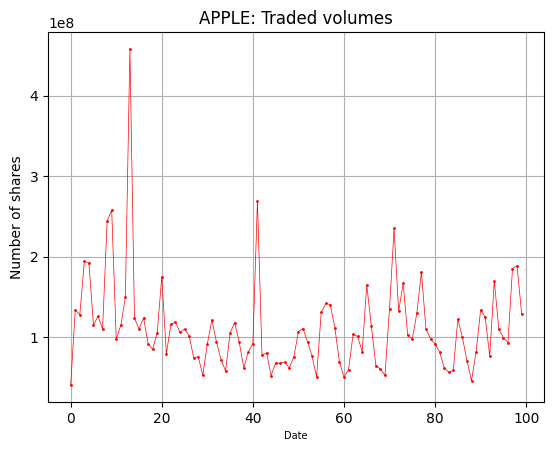

In [47]:
plt.title("APPLE: Traded volumes")
plt.xlabel("Date", fontsize=7) 
plt.ylabel("Number of shares") 
n_values = len(volume)

plt.plot(volume[0:100], 
         marker = 'o', markersize=1,
         linewidth=0.5, color = 'red')

plt.grid()

plt.show()

***Resining And Font Size***
What about <font color='blue'>**resizing**</font> the plots and changing the font size of labels, etc.?

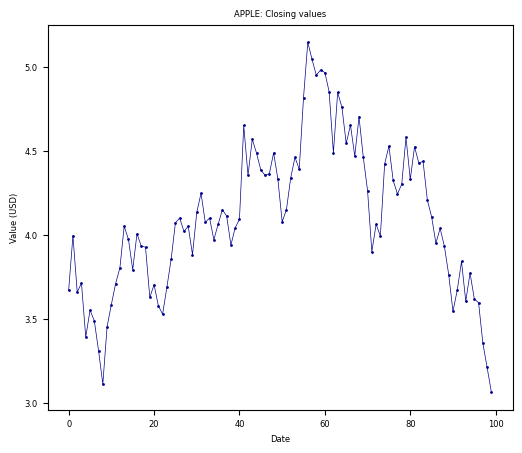

In [48]:
plt.figure ( figsize = (6,5))
scaled_fontsize = 6

plt.title("APPLE: Closing values", fontsize=scaled_fontsize)
plt.xlabel("Date", fontsize=scaled_fontsize) 
plt.ylabel("Value (USD)", fontsize=scaled_fontsize) 

plt.plot(close_val[0:100], 
         marker = 'o', markersize=1,
         linewidth=0.5, color = 'darkblue')

plt.xticks(fontsize=scaled_fontsize)
plt.yticks(fontsize=scaled_fontsize)


plt.show()

***
## More examples, more types of data graphs!

***
Let's read another dataset, reporting **data about mall customers,** and let's use again `csv` methods (it will be easier than before!)

In [31]:
import csv

f = open('Code/Mall_Customers.csv')

f_csv = csv.reader(f)

In [32]:
fieldnames = next(f_csv)
print(fieldnames)

print(len(fieldnames))

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
5


In [33]:
gender = []
age = []
income  = []
score = []
customer_id = []

for record in f_csv:
        customer_id.append(record[0])
        
        gender.append(record[1].strip()) # .strip() removes all extra white spaces!
                      
        age.append( int(record[2]) ) 
        income.append( int(record[3]) )
        score.append( int(record[4]) )

***
$\to$ This is <font color='red'>**NOT a time series** </font> of data!

***
### Scatter plots: Y vs. X
So far we have only plotted one time series of data. What about correlation between different series of **paired data?** $\to$ **$(x,y)$ data plots** showing $y$ vs. $x$ $\to$ <font color='red'>**Scatter plots** </font>
What about the **distribution of the values** of income vs. Customer id? (**Scatter plot of Income vs. Customer id**)

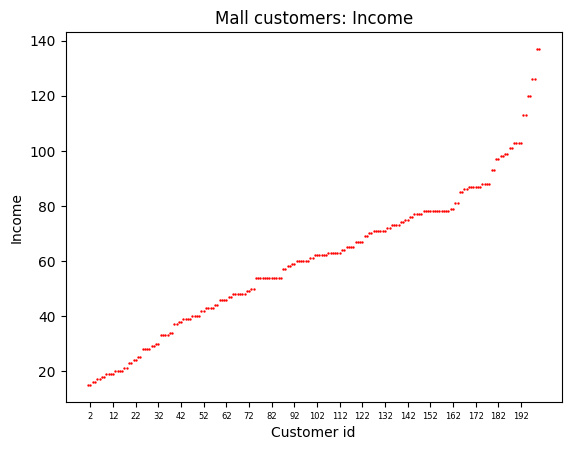

In [103]:
plt.title("Mall customers: Income")  
plt.xlabel("Customer id") 
plt.ylabel("Income") 

plt.scatter(customer_id, income, marker='o', s=0.5, color='red') 
#marker='>', s=1, color='red')
plt.xticks(customer_id[::10], fontsize=6)

plt.show()

It looks like the income grows with the customer id! (values have been sorted vs. the income)

***
How many **different markers** can we use? A lot! The named parameter `s` defines the size of the marker. Try them out to see the effect!

In [49]:
# Many different markers are available for the shape of the data points
#    =============    ===============================
#    character        description
#    =============    ===============================
#    ``'.'``          point marker
#    ``','``          pixel marker
#    ``'o'``          circle marker
#    ``'v'``          triangle_down marker
#    ``'^'``          triangle_up marker
#    ``'<'``          triangle_left marker
#    ``'>'``          triangle_right marker
#    ``'1'``          tri_down marker
#    ``'2'``          tri_up marker
#    ``'3'``          tri_left marker
#    ``'4'``          tri_right marker
#    ``'s'``          square marker
#    ``'p'``          pentagon marker
#    ``'*'``          star marker
#    ``'h'``          hexagon1 marker
#    ``'H'``          hexagon2 marker
#    ``'+'``          plus marker
#    ``'x'``          x marker
#    ``'D'``          diamond marker
#    ``'d'``          thin_diamond marker
#    ``'|'``          vline marker
#    ``'_'``          hline marker
#    =============    ===============================

***
What about the shopping scores vs. customer id? (**Scatter plot**)

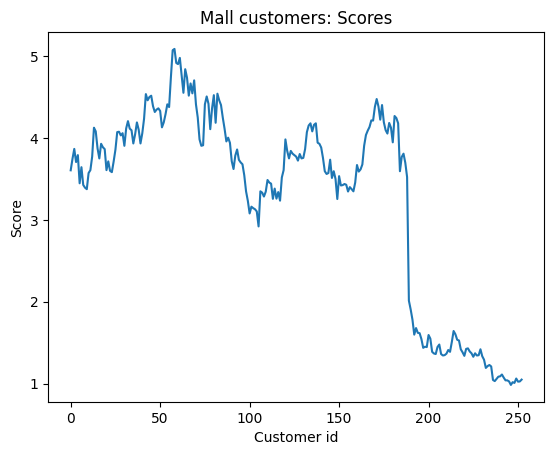

In [50]:
plt.title("Mall customers: Scores")  
plt.xlabel("Customer id") 
plt.ylabel("Score") 

#plt.scatter(open_val, linewidth=0.7, linestyle='dashed', label = 'Opening')
plt.plot(open_val, label = 'Opening')

#plt.xticks(customer_id[1::10], fontsize=6)

plt.show()

***
### Distribution of values for one single attribute: Histogram

The `hist` function plots histograms. A histogram takes a list of values, organizes them into bins, and then graphs how many items are in each bin. Note that the order of this list of values does not matter.

Let's start with a basic example that takes a small list of numbers and generates a histogram using the bins [0,2) (2 is not included in the bin), [2,4) (4 is not included in the bin), and [4,6]. Observe that the bin list specifies where each bin begins, and where the last bin ends.

There are a number of simple arguments you can pass to hist in order to improve the appearance of the histogram. From the example below, can you figure out what rwidth and color do? Change the values and experiment to see what happens to the graph.

**Aggregating** the data to check what the **distribution** of the scores look like in the customer population can be useful $\to$ <font color='red'>**Histogram**</font>

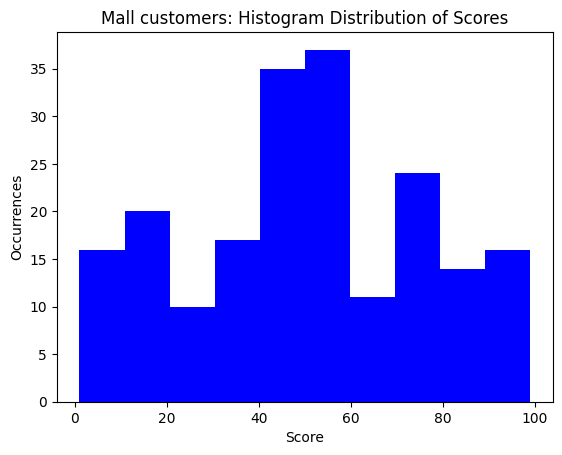

In [54]:
plt.title("Mall customers: Histogram Distribution of Scores")  

plt.xlabel("Score") 

plt.ylabel("Occurrences") 

plt.hist(score, bins=10, color='blue')

#plt.xticks(customer_id[1::10], fontsize=6)

plt.show()

***
What about the distribution (histogram) of the **age** of the customers?

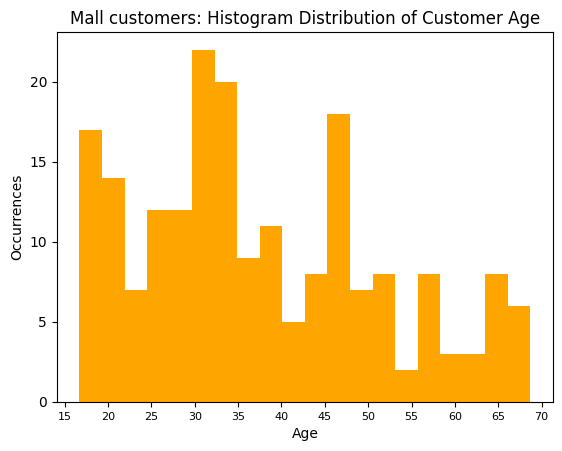

In [55]:

plt.title("Mall customers: Histogram Distribution of Customer Age")  

plt.xlabel("Age") 

plt.ylabel("Occurrences") 

plt.hist(age, bins=20, align='left',
         color='orange')

plt.xticks(range(15, 75, 5), fontsize=8)

plt.show()

***
### Distribution of multiple attributes: Pie and Bar chart graphs

***
What about the distribution of male vs. female?

In this case we have two values: number of male and number of female customers.

We need to count them from the `gender` list!


In [56]:
n_male = gender.count('Male')

n_female = gender.count('Female')

n_male, n_female

(88, 112)

***
How do we effectively show these proportions? ($\to$ a histogram is not really appropriate for showing proportions)

<font color='red'>
    
- **Pie chart**

- **Bar chart**
</font>

***
### Pie chart

The `pie` function from matplotlib plots pie charts. It expects a list of values as a parameter, and it will create one pie slice for each one of those values. The whole pie corresponds to the sum of values.

Optionally, we can pass a named parameter to this function to determine the label of each slice. The name of this parameter is `labels`, and the label must be at the same position in the list as its slice.

Another useful optional paramter for the `pie` function is `autopct="%.1f%%"` which writes the percentage of each slice on the pie.

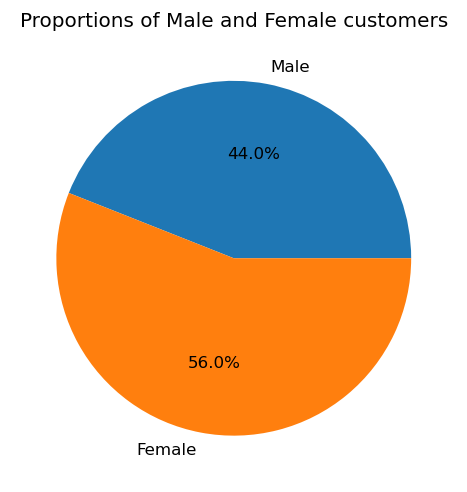

In [62]:

plt.title("Proportions of Male and Female customers")

plt.pie([n_male, n_female], 
        labels = ['Male', 'Female'],
        autopct="%.1f%%")  # this says to use one decimal digit and to use percentages

plt.show()

***Pie chart beautification***

Some **beautifying of the pie chart.**

`shadow` adds a shadowing, while `explode` is tuple, where if the i-th value is greater than 0, it indcates that the i-th slice of the pie will be detached from the rest of the pie (at a distance proportional to the indicated value).

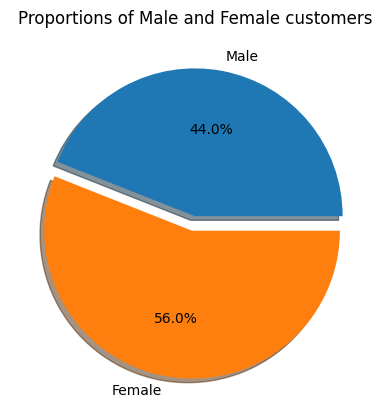

In [57]:
plt.title("Proportions of Male and Female customers")

plt.pie([n_male, n_female], 
        labels = ['Male', 'Female'], shadow=True, explode = (0, 0.1),
        autopct="%.1f%%") 

plt.show()

***
Can we make a pie chart for the customer age?

Yes, but we need to define age ranges, group / count the data accordingly, and store/define explanatory labels.

Let's consider 10-year ranges, starting from the minimal age up to the maximal age in the dataset.

We'll use a dictionary data structure.



In [58]:
import math

min_age = min(age)
max_age = max(age)

age_interval = 10

ranges_num = (max_age - min_age) / age_interval

ranges_num = math.ceil(ranges_num)
print(min_age, max_age, ranges_num)

18 70 6


In [59]:
age_dict = {}
initial_count = 0
for r in range(ranges_num):
        range_min = min_age + r * age_interval
        range_max = range_min + age_interval - 1
        range_str = str(range_min) + '-' + str(range_max)
        age_dict[ range_str ] = [range_min, range_max, initial_count]

In [60]:
age_dict

{'18-27': [18, 27, 0],
 '28-37': [28, 37, 0],
 '38-47': [38, 47, 0],
 '48-57': [48, 57, 0],
 '58-67': [58, 67, 0],
 '68-77': [68, 77, 0]}

In [61]:
for v in age:
    for r in age_dict:
        if v >= age_dict[r][0] and v <= age_dict[r][1]:
            age_dict[r][2] += 1
            break
            

In [62]:
age_dict

{'18-27': [18, 27, 46],
 '28-37': [28, 37, 61],
 '38-47': [38, 47, 36],
 '48-57': [48, 57, 31],
 '58-67': [58, 67, 20],
 '68-77': [68, 77, 6]}

***
Now we can show the counts in the selected ranges of age as proportions using a pie chart.

Counts are stored in the list `age_counts`

In [63]:
age_counts = []
for r in age_dict.values():
    age_counts.append(r[2])

In [64]:
age_counts

[46, 61, 36, 31, 20, 6]

Identify the age range with the highest count in order to explode that slice in the pie chart

In [65]:
max_range = max(age_counts)
max_range_idx = age_counts.index(max_range)

explode_flag = [0] * len(age_dict)
explode_flag[max_range_idx] = 0.1

In [66]:
explode_flag

[0, 0.1, 0, 0, 0, 0]

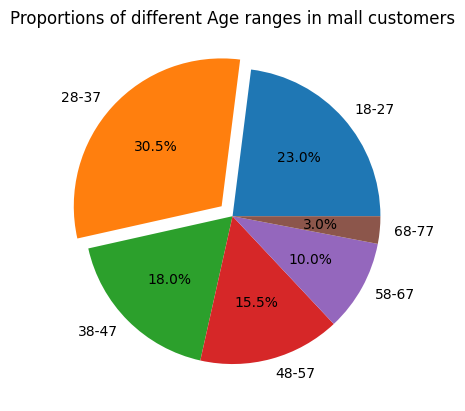

In [67]:
plt.title("Proportions of different Age ranges in mall customers")
    
plt.pie(age_counts, 
        labels = list(age_dict.keys()), 
        #shadow=True, 
        explode = explode_flag,
        autopct="%.1f%%")

plt.show()

***
### Bar chart

We can display the same data above using a **bar chart.**

The function `bar` is used to plot bar charts. A bar chart looks a lot like a histogram, but the difference is that the "bins" on the x-axis may be completely unrelated categories, while in histograms these are continuous values.

The `bar` function takes as paramters a list of the positions of the bars on the x-axis, and a list of the heights of each bar. Optionally you can define the named parameter `tick_label` as the list of labels for the bars to be placed on the x-axis.

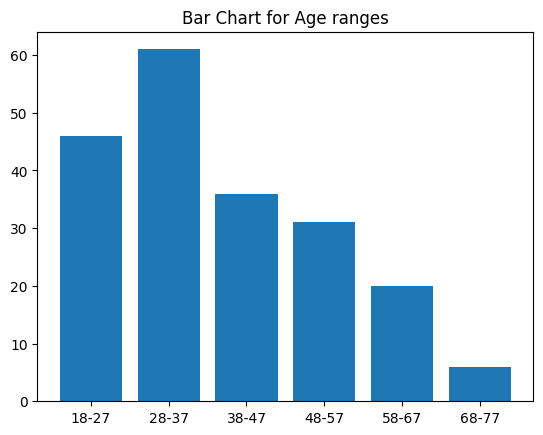

In [69]:
plt.title("Bar Chart for Age ranges")

plt.bar(range(1, len(age_counts)+1),         # position of the bars
        age_counts,                          # value/height of the bars
        tick_label = list(age_dict.keys()))  # what to display at the x ticks

plt.show()

## Subplots  

Sometimes you want to produce multiple different plots and display all of them at the same time, but not on the same set of axes.  We can accomplish this with subplots.

The `subplot` function can be used to allow multiple plots to be displayed in the same figure. It takes as arguments three numbers: the number of rows, the number of columns, and which subplot you want to activate.  For example, `plt.subplot(121)` arranges the subplots in a grid with 1 row and two columns, and then activate the first subplot (in this case, the left one).  `plt.subplot(122)` arranges the subplots the same way, but activate the 2nd subplot.

Consider the following example that graphs both sine and cosine in the same figure, but on different subplots. 

In [70]:
import numpy as np

# generate some random data

# for graph 1
yvals_1 = list(np.random.random_sample(10))

#for graph 2
xvals_2 = list(2 * np.random.random_sample(50))
yvals_2 = list(5 * np.random.random_sample(50))

#for graph 3
vals_3 = list(3 * np.random.random_sample(100) + 1) 

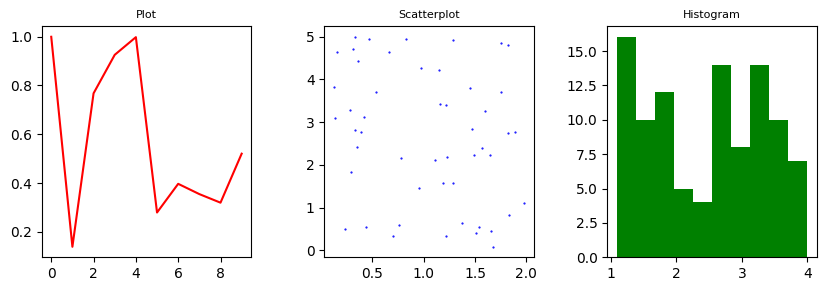

In [71]:
# define one line with 3 graphs (i.e., one plot with 3 subplots in a line)
rows = 1
columns = 3
fig, subplots = plt.subplots(rows, columns, figsize=(10, 3))

# adjust the spacing
fig.subplots_adjust(wspace=0.35)

# titles 
subplots[0].set_title('Plot', {'fontsize':'8'})
subplots[1].set_title('Scatterplot', {'fontsize':'8'})
subplots[2].set_title('Histogram', {'fontsize':'8'})

# the actual plots!
subplots[0].plot(yvals_1, color='r')
subplots[1].scatter(xvals_2, yvals_2, s=0.3,  color='b')
subplots[2].hist(vals_3, bins=10, color='g')
    
plt.show()

***
# More plots, more options to explore (use the `DictReader` CSV reader)

***
Let's reuse the financial data but use this time the `DictReader` option from the `csv` module, to make our life even easier!

In [72]:
import csv

f = open('Code/AAPL.csv')

f_csv = csv.DictReader(f)

In [73]:
print('There are', len(f_csv.fieldnames), 'fields/columns in the dataset')

print('\nThe list of field names is:\n', f_csv.fieldnames)


There are 7 fields/columns in the dataset

The list of field names is:
 ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


***
Since we want to perfom some processing on the data of each column, it's convenient to create a **dictionary**, let's call it `financial_data`, where:

- the field names are the keys

- the values are lists of values that be filled with the values that we will read from each colum of the file; we can start with an empty list `[]` as initial value

In [74]:
financial_data = {}
for k in f_csv.fieldnames:
    financial_data[k] = []

# dict.fromkeys(f_csv.fieldnames, []) # don't use this! The SAME list will be used for all keys

In [75]:
financial_data

{'Date': [],
 'Open': [],
 'High': [],
 'Low': [],
 'Close': [],
 'Adj Close': [],
 'Volume': []}

***
Let's now populate the lists with the values from the files.

We'll read the file line by line and append the values to the lists in the `financial_data` dictionary.

$\to$ Remember, dictionary's keys and field name in the `DictReader` structure are the same!

In [76]:
f.seek(0)
next(f_csv)

{'Date': 'Date',
 'Open': 'Open',
 'High': 'High',
 'Low': 'Low',
 'Close': 'Close',
 'Adj Close': 'Adj Close',
 'Volume': 'Volume'}

In [77]:
financial_data

{'Date': [],
 'Open': [],
 'High': [],
 'Low': [],
 'Close': [],
 'Adj Close': [],
 'Volume': []}

In [78]:
for line in f_csv:  # for each line in the file, where each line is a Ordered Dictionary!
    # print(line)
    for field_name in line.keys():   # for each field in a line
        
        #print(field_name, line[field_name])
        
        if field_name != 'Date':
            financial_data[field_name].append( float(line[field_name]) )
            
        else:
            financial_data[field_name].append(line[field_name])

***
Let's quickly check that things did go the way we expect ...

In [79]:
#financial_data['Volume']

***
How many data lines were there?

In [80]:
len(financial_data['Volume'])

253

***
Let's plot some data!

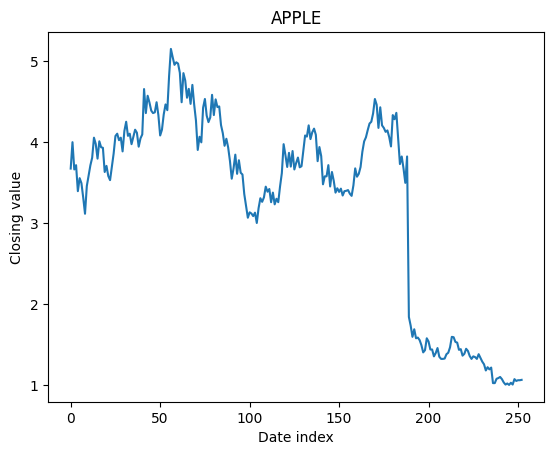

In [81]:
plt.title("APPLE")  # the title to give to the figure

plt.xlabel("Date index")  # x-axis label
plt.ylabel("Closing value")  # y-axis label

plt.plot(financial_data['Close'])

plt.show()

***


Add the **date on the x-axis**

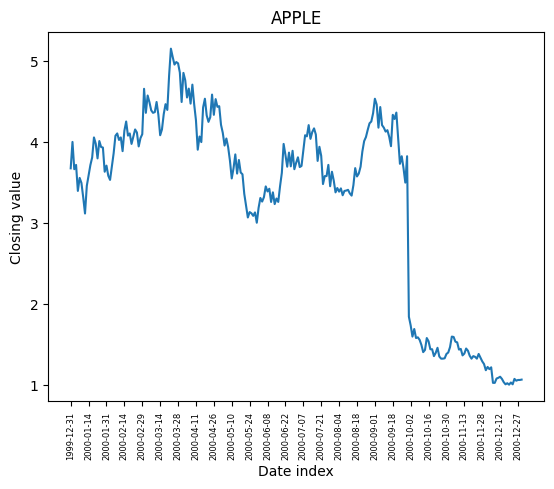

In [82]:
plt.title("APPLE")  # the title to give to the figure

plt.xlabel("Date index")  # x-axis label
plt.ylabel("Closing value")  # y-axis label

plt.plot(financial_data['Close'])

n_values = len(financial_data['Date'])
plt.xticks(range(0, n_values, 10), financial_data['Date'][::10], 
           fontsize=6, rotation=90)

plt.show()


***
# A dataset about attributes in the animal world

Let's read a more interesting file and use `csv` methods

In [84]:
import csv
f = open('Code/zoological_attributes.csv')

f_csv = csv.DictReader(f)


In [85]:
f_csv.fieldnames

['name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

In [86]:
len(f_csv.fieldnames)

18

In [87]:
properties = dict.fromkeys(f_csv.fieldnames, 0)

In [88]:
properties

{'name': 0,
 'hair': 0,
 'feathers': 0,
 'eggs': 0,
 'milk': 0,
 'airborne': 0,
 'aquatic': 0,
 'predator': 0,
 'toothed': 0,
 'backbone': 0,
 'breathes': 0,
 'venomous': 0,
 'fins': 0,
 'legs': 0,
 'tail': 0,
 'domestic': 0,
 'catsize': 0,
 'type': 0}

Count how many animal entries have a certain property

In [89]:
f.seek(0)

next(f_csv)

count = 0
for animal_data in f_csv:
    #print(animal_data)
    for p in list(properties.keys())[1:]:
        properties[p] += int(animal_data[p])  # exploit that the value of a property is either 0 or 1
    count +=1
    
print('Total number of animal entries:', count)

Total number of animal entries: 101


In [90]:
properties

{'name': 0,
 'hair': 43,
 'feathers': 20,
 'eggs': 59,
 'milk': 41,
 'airborne': 24,
 'aquatic': 36,
 'predator': 56,
 'toothed': 61,
 'backbone': 83,
 'breathes': 80,
 'venomous': 8,
 'fins': 17,
 'legs': 287,
 'tail': 75,
 'domestic': 13,
 'catsize': 44,
 'type': 286}

***
Make a pie chart for the property counts

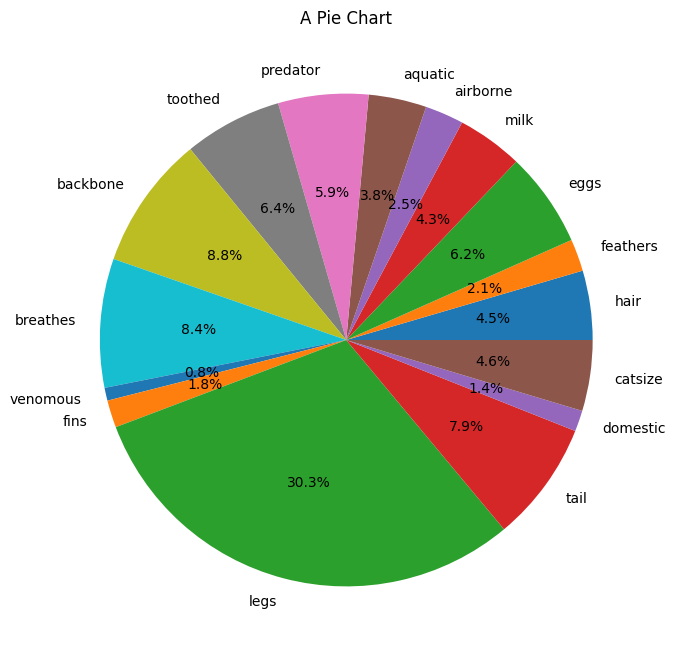

In [91]:
xsize = 8
ysize = 8
plt.figure(figsize=(xsize, ysize)) 
# Make the chart a circle, otherwise it'll be an ellipsis fir xsize different from ysize

plt.title("A Pie Chart")

plt.pie(list(properties.values())[1:-1],  # Type attribute, which is the last one, is not considered
        labels=list(properties.keys())[1:-1], 
        autopct="%.1f%%")

plt.show()